<a href="https://colab.research.google.com/github/gulabpatel/Computer_Vision/blob/main/Segmentation/HealthCare/02_TransUNet_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Image Segmentation with Vision Transformers as a strong Encoder


TransUNet is a hybrid CNN-Transformer in a U-shaped architecture able to leverage both detailed high-resolution spatial information from CNN features and the global context encoded by Transformers in order to perform medical image segmentation.

TansUNet was proposed by J.Chen et al. [in Feb 2021](https://arxiv.org/pdf/2102.04306.pdf).


Authors:
*   [Agnieszka Miszkurka](https://www.linkedin.com/in/agnieszka-miszkurka/)
*   [Tobias Höppe](https://www.linkedin.com/in/tobias-h%C3%B6ppe-3b3398199/)
*   [Kenza Bouzid](https://www.linkedin.com/in/kenza-bouzid/?locale=en_US)

# Environment Set Up

In [ ]:
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ugXdSGGDJaOM-rOx_boQYoO71tTSe9k6' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ugXdSGGDJaOM-rOx_boQYoO71tTSe9k6" -O 224_transunet_train_all_data2.zip && rm -rf /tmp/cookies.txt
# !unzip 224_transunet_train_all_data2.zip
# !rm -r 224_transunet_train_all_data2.zip

In [ ]:
!git clone https://github.com/KenzaB27/TransUnet.git
%cd TransUnet
!pip install -r requirements.txt

In [ ]:
import data_processing.data_parser as data_parser
import models.transunet as transunet
import utils.visualize as visualize
import experiments.config as conf
import importlib

# TransUNet in Action

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
BATCH_SIZE=1

### Load Model and Test Dataset

In [5]:
saved_model_path = "/content/drive/MyDrive/224_transunet_train_all_data2/model"
config = conf.get_transunet()
network = transunet.TransUnet(config)
network.load_model(saved_model_path=saved_model_path)

In [6]:
importlib.reload(data_parser)
data_reader = data_parser.DataReader(src_path="synapse_ct_scans/", height=224, width=224, depth=3)
test_dataset = data_reader.get_test_data(image_size=224, use_self_filenames=True, shuffle=True)

## Segment Synapse multi-organ slices

1/1 [==============================] - 7s 7s/step


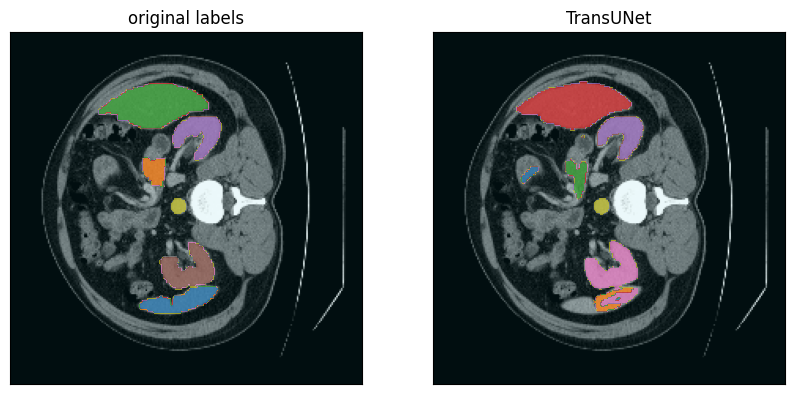

1/1 [==============================] - 0s 81ms/step


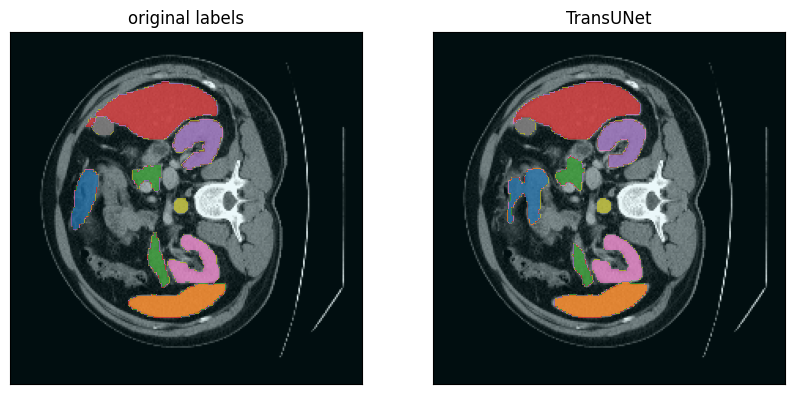

1/1 [==============================] - 0s 110ms/step


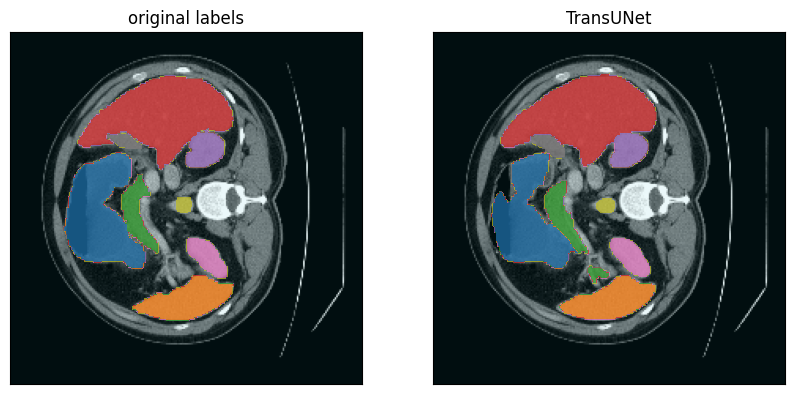

1/1 [==============================] - 0s 110ms/step


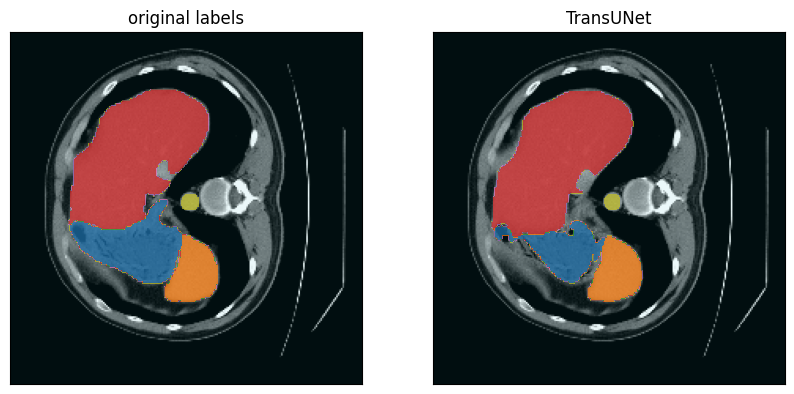

1/1 [==============================] - 0s 81ms/step


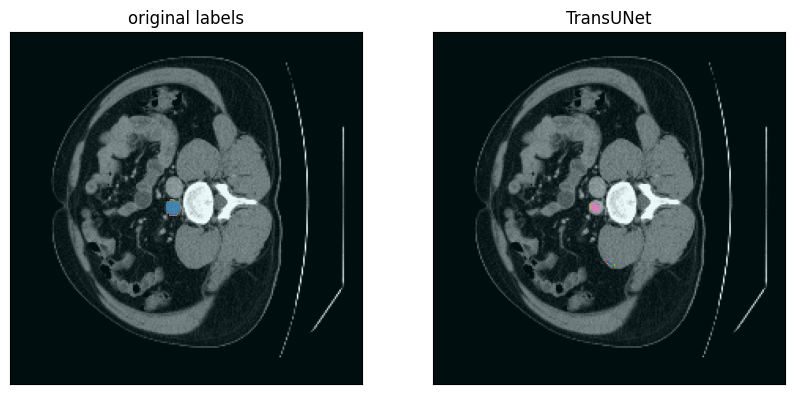

1/1 [==============================] - 0s 81ms/step


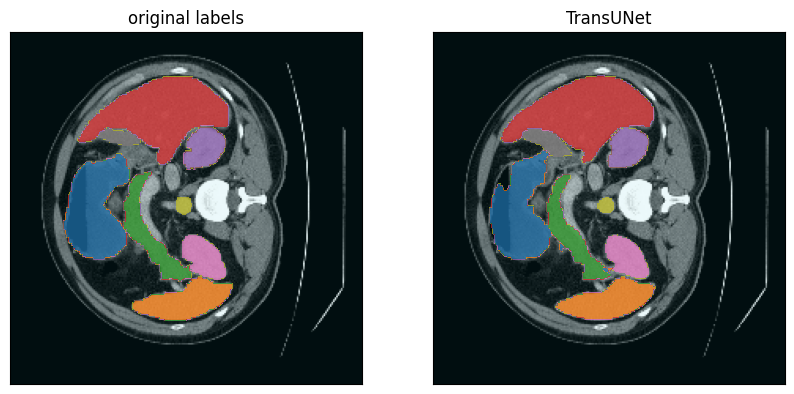

1/1 [==============================] - 0s 82ms/step


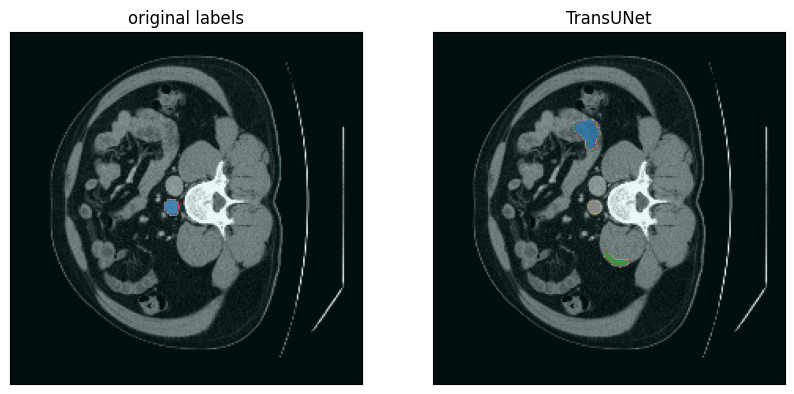

1/1 [==============================] - 0s 82ms/step


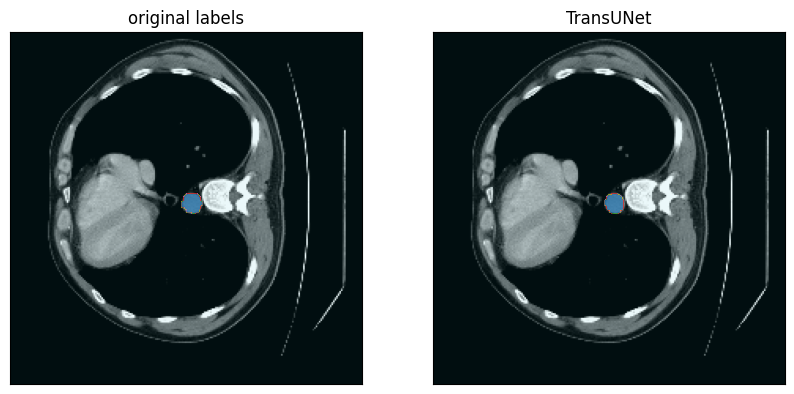

1/1 [==============================] - 0s 85ms/step


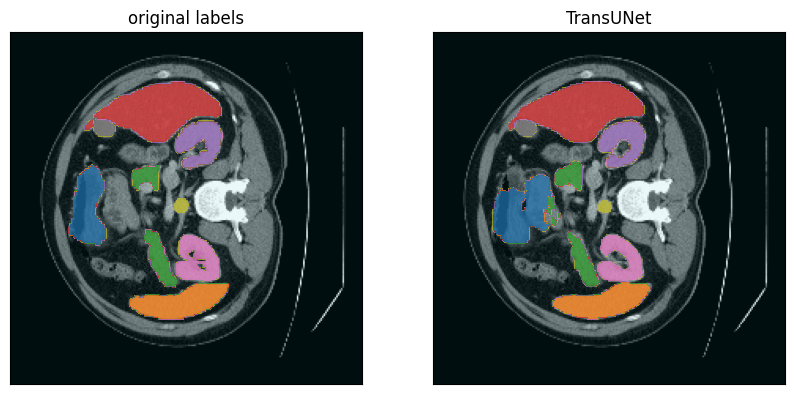

1/1 [==============================] - 0s 86ms/step


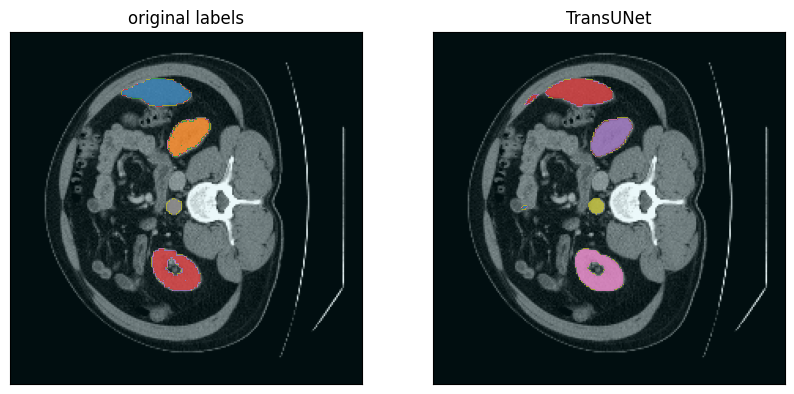

1/1 [==============================] - 0s 90ms/step


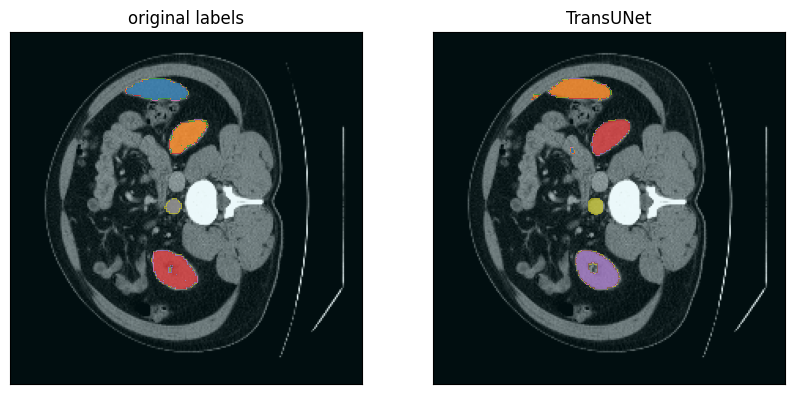

1/1 [==============================] - 0s 81ms/step


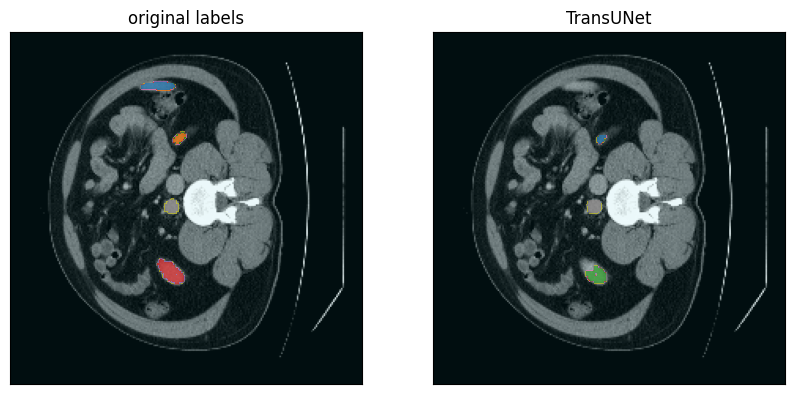

In [7]:
for i, img_lab in enumerate(test_dataset.take(32)):
  img = img_lab[0]
  lab = img_lab[1]
  visualize.visualize_non_empty_predictions(img, lab, [network])